In [1]:
import numpy as np

In [2]:
X = np.array([[10,20,10],
              [2,5,2],
              [8,17,7],
              [9,20,10],
              [12,22,11]])

In [3]:
print (X)

[[10 20 10]
 [ 2  5  2]
 [ 8 17  7]
 [ 9 20 10]
 [12 22 11]]


In [4]:
X = np.mat(X)
meanVals = np.mean(X, axis=0)
A = X - meanVals              # A is the zero-mean (centered) version of X
C = np.cov(A, rowvar=0)       # C is the covarianvce matrix of X
print (C)

[[14.2  25.3  13.5 ]
 [25.3  46.7  24.75]
 [13.5  24.75 13.5 ]]


In [5]:
# Note that C = (1/(N-1)) A.T*A

print (np.dot(A.T,A)/(np.shape(X)[0]-1))

[[14.2  25.3  13.5 ]
 [25.3  46.7  24.75]
 [13.5  24.75 13.5 ]]


#### Now we can obtain eigenvalues and eigenvectors of the covariance matrix:

In [6]:
np.set_printoptions(precision=2,suppress=True)
e, ev = np.linalg.eig(C)
print ("Eigenvalues:")
print (e)
print ("Eigenvectors:")
print (ev)

Eigenvalues:
[73.72  0.38  0.3 ]
Eigenvectors:
[[ 0.43  0.9  -0.04]
 [ 0.79 -0.41 -0.45]
 [ 0.42 -0.16  0.89]]


#### We can transform the full data into the new feature space based on the eigenvectors:

In [7]:
newFeatures = ev.T
XTrans = np.dot(newFeatures, A.T)
print (XTrans.T)

[[  4.17   0.     0.26]
 [-14.61   0.17   0.25]
 [ -0.35  -0.1   -0.97]
 [  3.74  -0.9    0.3 ]
 [  7.05   0.83   0.16]]


#### However, typically, we want a lower-dimensional space. We can sort the eigenvectors in the decreasing order of their eigenvalues and take the top k. In the example below, we'll take only the top first principal component (since it has the largest eigenvalue, no sorting necessary):

In [8]:
reducedFeatures = ev[:,0].T
redcuedXTrans = np.dot(reducedFeatures, A.T)
print (redcuedXTrans.T)

[[  4.17]
 [-14.61]
 [ -0.35]
 [  3.74]
 [  7.05]]


#### We can also use Scikit-learn decomposition module to do the same thing:

In [9]:
from sklearn import decomposition

In [10]:
pca = decomposition.PCA()
XTrans2 = pca.fit_transform(X)

In [11]:
print (XTrans2)

[[-4.17 -0.   -0.26]
 [14.61 -0.17 -0.25]
 [ 0.35  0.1   0.97]
 [-3.74  0.9  -0.3 ]
 [-7.05 -0.83 -0.16]]


#### The remaining part of this notebook, is another example of using PCA for dimensionality reduction:

In [12]:
M = np.array([[2.5, 2.4],
           [0.5, 0.7],
           [2.2, 2.9],
           [1.9, 2.2],
           [3.1, 3.0],
           [2.3, 2.7],
           [2, 1.6],
           [1, 1.1],
           [1.5, 1.6],
           [1.1, 0.9]])

In [13]:
meanM = np.mean(M, axis=0)
MC = M - meanM             # MC is the zero-mean (centered) version of X
CovM = np.cov(MC, rowvar=0)    # CovM is the covarianvce matrix of M
print ("Zero Mean Matrix:\n", MC,"\n")
print ("Covariance Matrix:\n", CovM,"\n")

Zero Mean Matrix:
 [[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]] 

Covariance Matrix:
 [[0.62 0.62]
 [0.62 0.72]] 



In [14]:
eigVals, eigVecs = np.linalg.eig(CovM)
print ("Eigenvalues:\n", eigVals,"\n")
print ("Eigenvectors:\n", eigVecs,"\n")

Eigenvalues:
 [0.05 1.28] 

Eigenvectors:
 [[-0.74 -0.68]
 [ 0.68 -0.74]] 



In [15]:
newFeatures = eigVecs[:,1].T

In [16]:
MTrans = np.dot(newFeatures, MC.T)
print (np.mat(MTrans).T)

[[-0.83]
 [ 1.78]
 [-0.99]
 [-0.27]
 [-1.68]
 [-0.91]
 [ 0.1 ]
 [ 1.14]
 [ 0.44]
 [ 1.22]]


In [17]:
pca2 = decomposition.PCA(n_components=1)
MTrans2 = pca2.fit_transform(M)
print (MTrans2)

[[-0.83]
 [ 1.78]
 [-0.99]
 [-0.27]
 [-1.68]
 [-0.91]
 [ 0.1 ]
 [ 1.14]
 [ 0.44]
 [ 1.22]]


[0.99 0.01 0.  ]


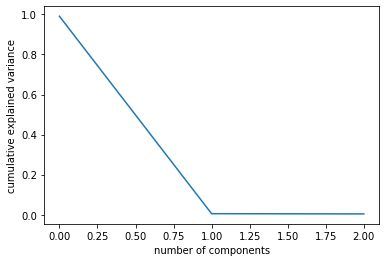

In [25]:
print(pca.explained_variance_ratio_)
from matplotlib import*
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot((pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()